<a href="https://colab.research.google.com/github/jisusP/MachineLearning/blob/main/et_met_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tratamiento de los datos

In [1]:
import pandas as pd
ruta = "/content/etanol_metanol_gasolina.xlsx"
df = pd.read_excel(ruta)
df

,Unnamed: 0,Methanol,Etanol,Gas,834(1),834(2),834(3),834,835(1),835(2),...,2479,2481,2483,2486,2488,2491,2493,2495,2498,2500
0,METANOL,100.0,0.0,0.0,-0.33862,-0.33866,-0.33867,-0.33860,-0.33861,-0.33862,...,2.82509,2.79669,2.77369,2.73846,2.70282,2.66621,2.63461,2.61122,2.59649,2.56543
1,METANOLA,100.0,0.0,0.0,-0.33093,-0.33098,-0.33094,-0.33087,-0.33090,-0.33091,...,2.84691,2.80658,2.76522,2.73446,2.70467,2.68356,2.66639,2.63928,2.61376,2.57099
2,ETANOL,0.0,100.0,0.0,-0.32299,-0.32306,-0.32303,-0.32297,-0.32299,-0.32300,...,2.87722,2.83780,2.79462,2.76492,2.72422,2.69589,2.67057,2.63601,2.61796,2.58685
3,ETANOLA,0.0,100.0,0.0,-0.32233,-0.32234,-0.32232,-0.32227,-0.32231,-0.32233,...,2.85155,2.82769,2.79065,2.76122,2.73081,2.69421,2.66618,2.64398,2.62231,2.58395
4,GASOLINA,0.0,0.0,100.0,-0.31900,-0.31924,-0.31942,-0.31956,-0.31980,-0.31999,...,2.78439,2.75345,2.70680,2.66352,2.64233,2.61682,2.60014,2.57798,2.53463,2.50223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,M7C,7.0,0.0,93.0,-0.31211,-0.31232,-0.31244,-0.31252,-0.31274,-0.31292,...,2.84653,2.82076,2.79089,2.75683,2.72383,2.69748,2.66299,2.62005,2.59786,2.57569
60,M7.5E5,7.5,5.0,87.5,-0.31112,-0.31129,-0.31142,-0.31151,-0.31168,-0.31183,...,2.84690,2.81019,2.76245,2.73630,2.71421,2.68969,2.66261,2.62405,2.59005,2.56114
61,M7.5E5A,7.5,5.0,87.5,-0.30676,-0.30693,-0.30706,-0.30710,-0.30724,-0.30742,...,2.85358,2.82567,2.78108,2.74546,2.71096,2.68275,2.66826,2.62429,2.58928,2.57607
62,M7.5E5B,7.5,5.0,87.5,-0.30588,-0.30605,-0.30614,-0.30626,-0.30646,-0.30656,...,2.85953,2.83663,2.81060,2.78571,2.75250,2.71349,2.68253,2.64221,2.62418,2.60652


In [31]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

x = df.drop(["Unnamed: 0", "Methanol", "Etanol", "Gas"], axis = 1) #Todos los valores excepto los de las columnas nombradas
x.columns = x.columns.astype(str)

#x = x.drop([60, 40, 20, 10], axis=0)
composition = df.iloc[:,[1,2,3]] #Obtengo todas las filas de las columnas seleccionadas
#composition = composition.drop([60, 40, 20, 10], axis=0)

#Aplicando PCA
pca = PCA(n_components = 3)
x_pca = pca.fit_transform(x)
loadings = pd.DataFrame(pca.components_, columns=x.columns)

x_train, x_test, composition_train, composition_test = train_test_split(x_pca, composition, test_size =0.2)


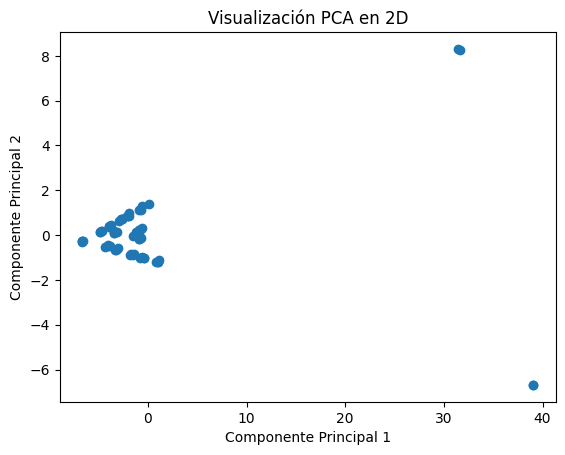

In [11]:
from mpl_toolkits.mplot3d import Axes3D  # Solo si deseas gráficos en 3D
import matplotlib.pyplot as plt

# Si tienes más de 3 componentes principales, selecciona las primeras 3 para visualización
num_componentes_visualizar = min(3, x_pca.shape[1])
componentes_visualizar = x_pca[:, :num_componentes_visualizar]

plt.scatter(componentes_visualizar[:, 0], componentes_visualizar[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización PCA en 2D')
plt.show()

In [27]:
loadings = pd.DataFrame(pca.components_, columns=x.columns)
loadings

,834(1),834(2),834(3),834,835(1),835(2),835,836(1),836(2),836(3),...,2479,2481,2483,2486,2488,2491,2493,2495,2498,2500
0,-0.000476,-0.000471,-0.000467,-0.000463,-0.000458,-0.000454,-0.000450,-0.000447,-0.000445,-0.000442,...,0.000352,0.000400,0.000412,0.000428,0.000318,0.000311,0.000443,0.000566,0.000794,0.000651
1,0.000645,0.000646,0.000647,0.000647,0.000647,0.000649,0.000648,0.000647,0.000648,0.000648,...,0.001891,0.001935,0.001667,0.001745,0.001485,0.001415,0.001215,0.001187,0.001287,0.001275
2,0.000977,0.000995,0.001019,0.001033,0.001043,0.001052,0.001059,0.001073,0.001085,0.001091,...,0.009800,0.012191,0.011127,0.012172,0.012809,0.010749,0.011222,0.009545,0.011008,0.014370


In [21]:
x_pca

array([[ 3.90509841e+01, -6.67422372e+00, -1.27139440e+00],
       [ 3.90598488e+01, -6.68407664e+00, -1.08575883e+00],
       [ 3.14398960e+01,  8.30730138e+00,  4.18803577e-01],
       [ 3.16503198e+01,  8.27728263e+00,  3.96501211e-01],
       [-6.63490429e+00, -2.87340409e-01, -1.17389431e+00],
       [-6.64895211e+00, -2.75659877e-01, -1.14287574e+00],
       [-6.60426780e+00, -2.67182359e-01, -1.12233753e+00],
       [-6.65264536e+00, -2.71948254e-01, -1.12269036e+00],
       [-4.83446051e+00,  1.36458864e-01, -9.32618434e-01],
       [-4.87131916e+00,  1.42089463e-01, -8.63133282e-01],
       [-4.69450020e+00,  1.61206547e-01, -8.84870825e-01],
       [-4.71399667e+00,  1.62985008e-01, -8.91955536e-01],
       [-3.95812256e+00,  3.93599844e-01, -7.66449211e-01],
       [-3.99517206e+00,  3.80615056e-01, -7.67323897e-01],
       [-3.69676738e+00,  4.38010792e-01, -7.51321627e-01],
       [-3.80976323e+00,  4.11838316e-01, -7.84622165e-01],
       [-2.96288155e+00,  6.36140193e-01

In [15]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance_ratio)

Varianza explicada por cada componente: [0.9478467  0.04313174 0.00670267]


Text(0.5, 0, 'Component')

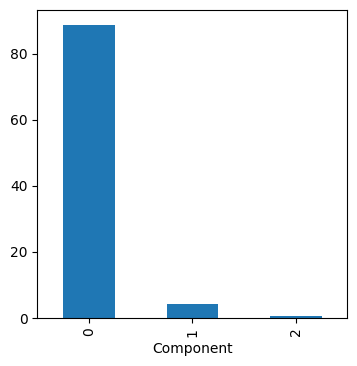

In [17]:
varianza = pd.DataFrame(pca.explained_variance_)
ax = varianza.plot.bar(legend=False, figsize=(4,4))
ax.set_xlabel("Component")

Entrenamiento de Red

In [39]:
import tensorflow as tf
import numpy as np
capa1 = tf.keras.layers.Dense(units=64, input_shape=(3,), activation = "relu")
capa2 = tf.keras.layers.Dense(units=32, activation="sigmoid")
capa3 = tf.keras.layers.Dense(units=16, activation="sigmoid")
wait = tf.keras.layers.Dropout(0.5)
salida = tf.keras.layers.Dense(units=3, activation = "softmax")


modelo = tf.keras.Sequential([capa1, salida])#([capa1, capa2,capa3, salida])
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.0001), #(learning_rate=0.0001, weight_decay=1e-5, use_ema=True, ema_momentum=0.99, amsgrad=True), #Adam:42%, SGD no funcionó, Adagrad:143%, Adadelta:122%, Nadam:83%,
    #Ftrl(learning_rate_power=-0.5): 48%, Adamax:45%, Adam(learning_rate=0.0001, amsgrad=True):37%, AdamW:35%
    loss = "CategoricalCrossentropy", #Ó categorical_crossentropy, mean_squared_error
    metrics =["accuracy"]
)
print("Comenzando entrenamiento:...")
proceso = modelo.fit(x_train, composition_train, epochs=500, verbose=False) #,batch_size=500
print("modelo entrenado")

Comenzando entrenamiento:...
modelo entrenado


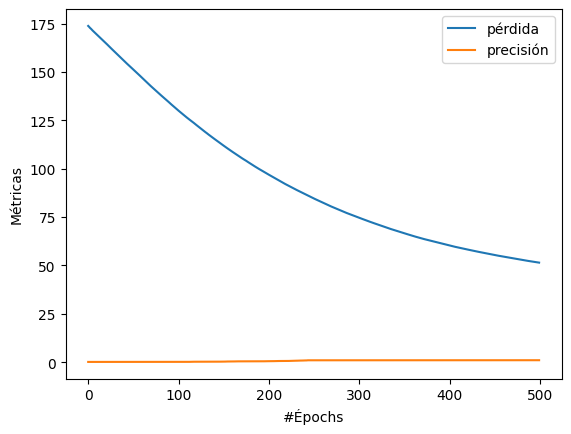

In [40]:
import matplotlib.pyplot as plt
plt.xlabel("#Épochs")
plt.ylabel("Métricas")
plt.plot(proceso.history["loss"], label = "pérdida")
plt.plot(proceso.history["accuracy"], label="precisión")
plt.legend()
plt.show()

In [41]:
loss, accuracy = modelo.evaluate(x_test, composition_test)
print(f"Pérdida en datos de prueba: {loss}")
print(f"Precisión en datos de prueba: {accuracy}")
predicciones = modelo.predict(x_test)
print(predicciones)

1/1 [==============================] - 0s 137ms/step - loss: 57.3702 - accuracy: 1.0000
Pérdida en datos de prueba: 57.37019348144531
Precisión en datos de prueba: 1.0
1/1 [==============================] - 0s 49ms/step
[[0.28399205 0.17668244 0.5393255 ]
 [0.19490466 0.06285046 0.74224484]
 [0.27116454 0.19004059 0.53879493]
 [0.28572893 0.18016906 0.5341021 ]
 [0.24036036 0.10459726 0.65504223]
 [0.20485553 0.07597113 0.7191733 ]
 [0.21640709 0.08490746 0.6986854 ]
 [0.19536471 0.06811139 0.73652387]
 [0.28833488 0.18307306 0.52859205]
 [0.16135536 0.04562877 0.7930159 ]
 [0.22252819 0.12058259 0.6568892 ]
 [0.2718588  0.18297252 0.5451687 ]
 [0.25577462 0.13378514 0.61044025]]


Predicción

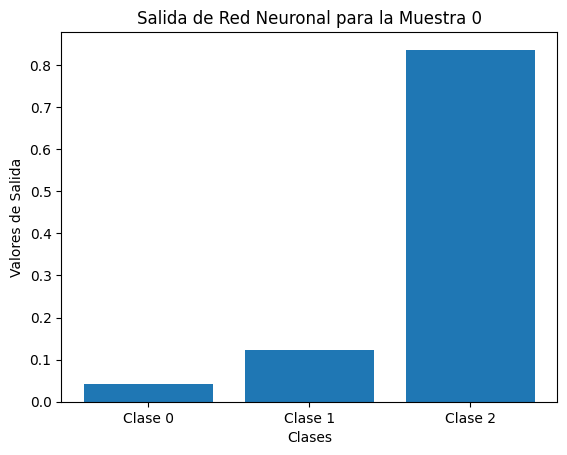

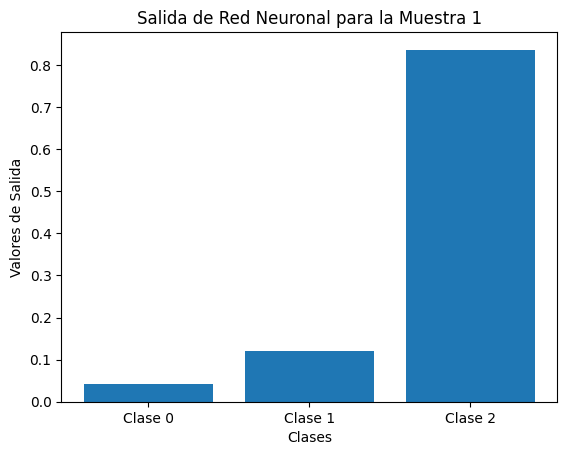

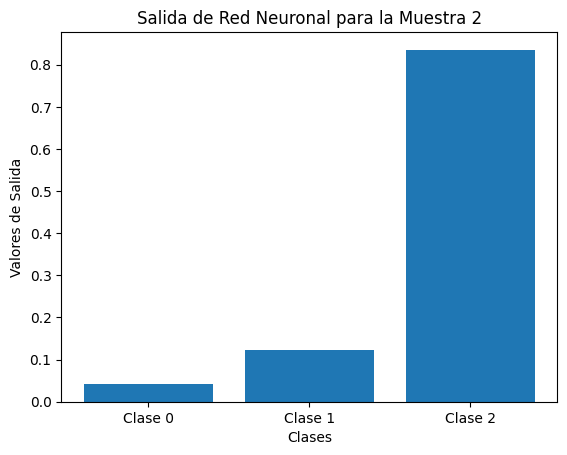

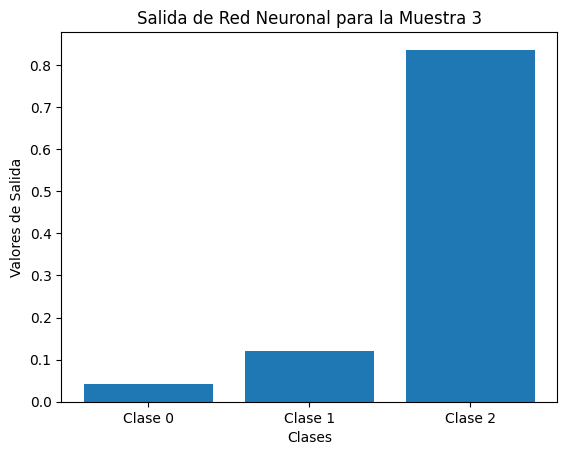

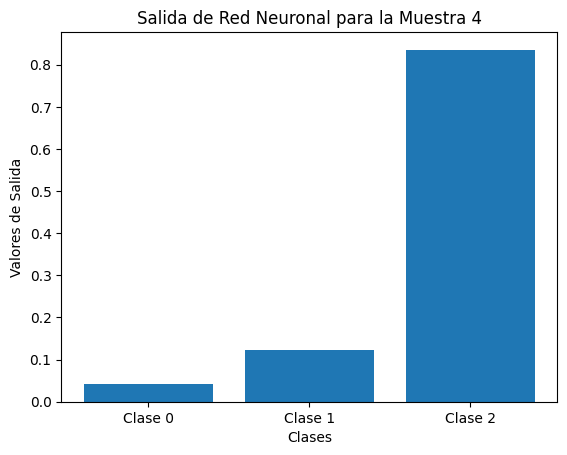

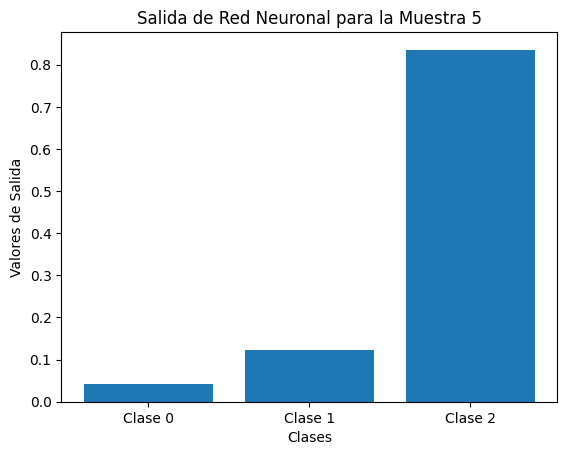

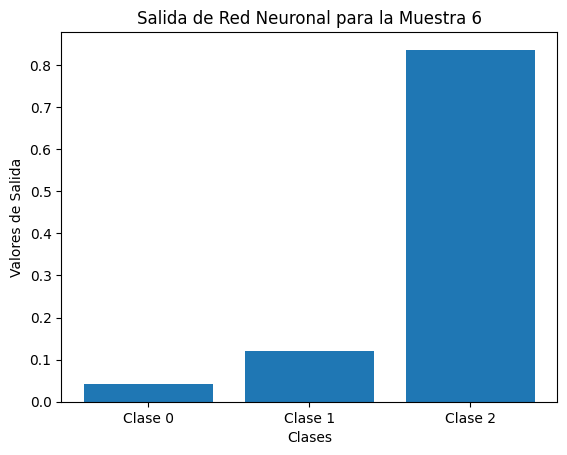

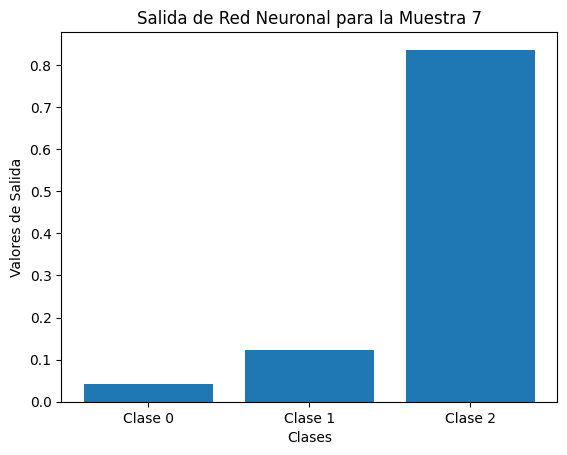

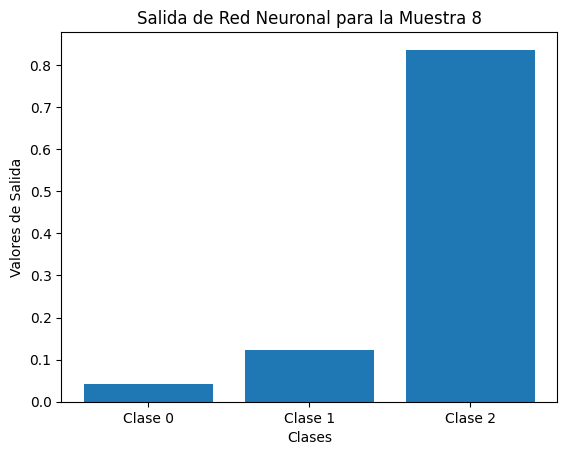

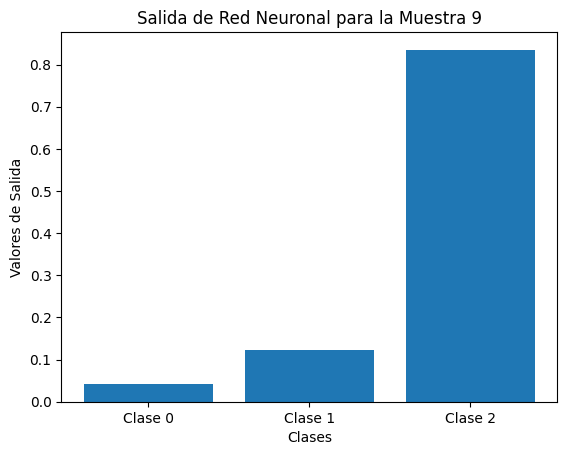

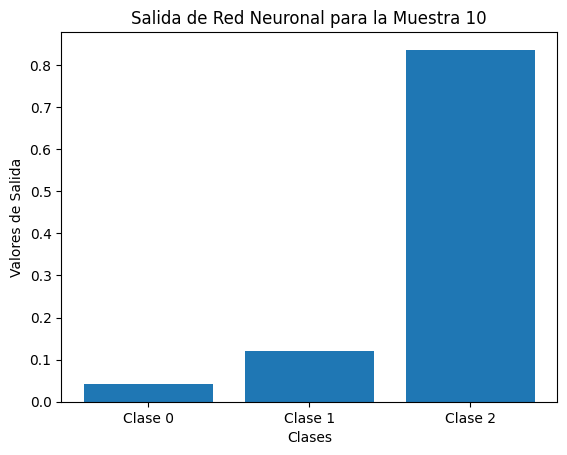

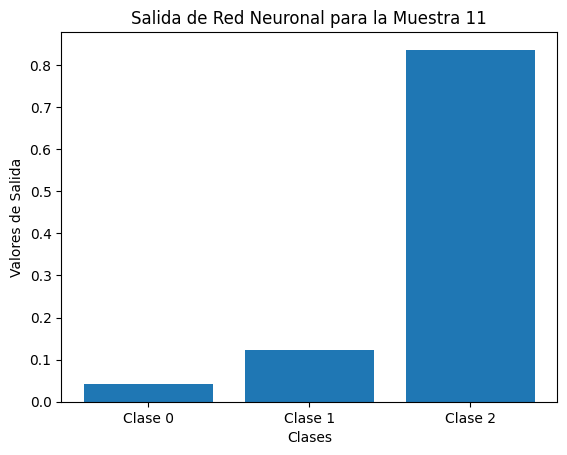

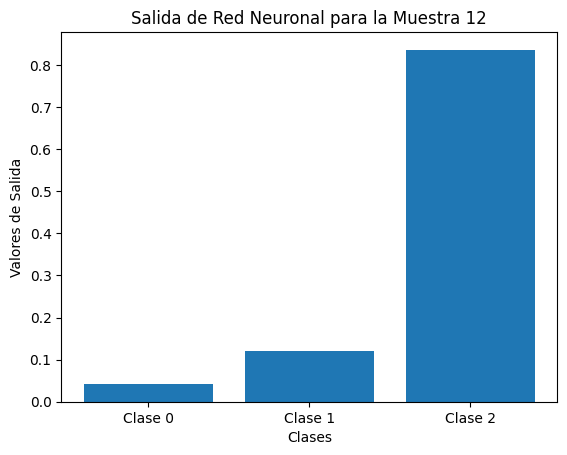

In [ ]:
num_classes = 3

# Crear un gráfico de barras para cada muestra en los datos de prueba
for i in range(len(composition_test)):
    plt.figure()
    plt.bar(range(num_classes), predicciones[i], tick_label=[f"Clase {j}" for j in range(num_classes)])
    plt.xlabel('Clases')
    plt.ylabel('Valores de Salida')
    plt.title(f'Salida de Red Neuronal para la Muestra {i}')
    plt.show()

In [ ]:

indices_espectros = [10,20,40,60]
espectros_predict = df.iloc[indices_espectros]
espectros_predict = espectros_predict.drop(["Unnamed: 0", "Methanol", "Etanol", "Gas"], axis=1)
"""f=a.iloc[3]
f_array = f.values.reshape(1,-1)
tensor = tf.convert_to_tensor(f_array, dtype=tf.float32)"""
print("Predicción")
resultado = modelo.predict(espectros_predict)
for idx, result in enumerate(resultado):
    print(f"Predicción para espectro {indices_espectros[idx]}:", resultado)